In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import matplotlib

In [58]:
class DataGaner():
    
    def __init__(self, size=275):
        self.size = size
        
    def create_data(self, type="complex"):
        if type == "comples":
            self.data = [(np.random.randn()/6 - 1, np.random.randn()/6 - 1) for i in range(self.size)]
            self.data.extend([(np.random.randn()/4 + 2.5, np.random.randn()/5) for i in range(self.size)])
            self.data.extend([(np.random.randn()/3 - 2, np.random.randn()/10 + 1) for i in range(self.size)])
            self.data.extend([(np.random.randn()/50 - 2, np.random.randn() + 1) for i in range(self.size)])
            self.data.extend([(np.random.randn()/5 + 1, np.random.randn()/2 + 1) for i in range(self.size)])
            self.data.extend([(i/25 - 1, + np.random.randn()/20 - 3) for i in range(self.size)])
            self.data.extend([(i/25 - 2.5, 9 - (i/50 - 2)**2 + np.random.randn()/20) for i in range(self.size)])
            self.data.extend([(i/25 - 2.5, 6 + (i/50 - 2)**2 + np.random.randn()/2) for i in range(self.size)])
            self.data = np.array(self.data)
        else:
            self.data = [(np.random.randn()/6, np.random.randn()/6) for i in range(150)]
            self.data.extend([(np.random.randn()/4 + 2.5, np.random.randn()/5) for i in range(150)])
            self.data.extend([(np.random.randn()/5 + 1, np.random.randn()/2 + 1) for i in range(150)])
            self.data.extend([(i/25 - 1, + np.random.randn()/20 - 1) for i in range(100)])
            self.data.extend([(i/25 - 2.5, 3 - (i/50 - 2)**2 + np.random.randn()/20) for i in range(100)])
            self.data = np.array(self.data)
        
    def print_data(self):
        print(self.data[:])
    
    def plot_data(self):
        fig, ax = plt.subplots(figsize=(20,10))
        ax.use_sticky_edges = False
        ax.margins(0.07)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.scatter(self.data[:,0], self.data[:,1])
        ax.set_title(f"generated_data_set")
        plt.show()


[[-1.08384024 -1.19801109]
 [-1.03492974 -0.98763867]
 [-0.98294816 -1.27668431]
 ...
 [ 8.38       18.60514024]
 [ 8.42       17.92310943]
 [ 8.46       17.36094454]]


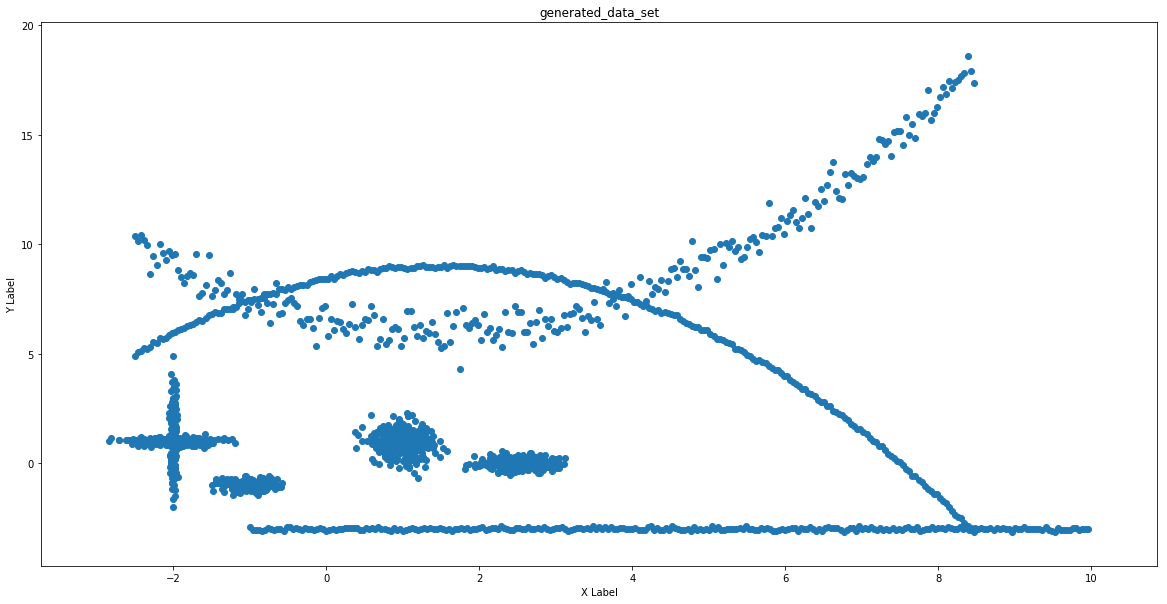

In [59]:
dg = DataGaner()
dg.create_data()
dg.print_data()
dg.plot_data()

14


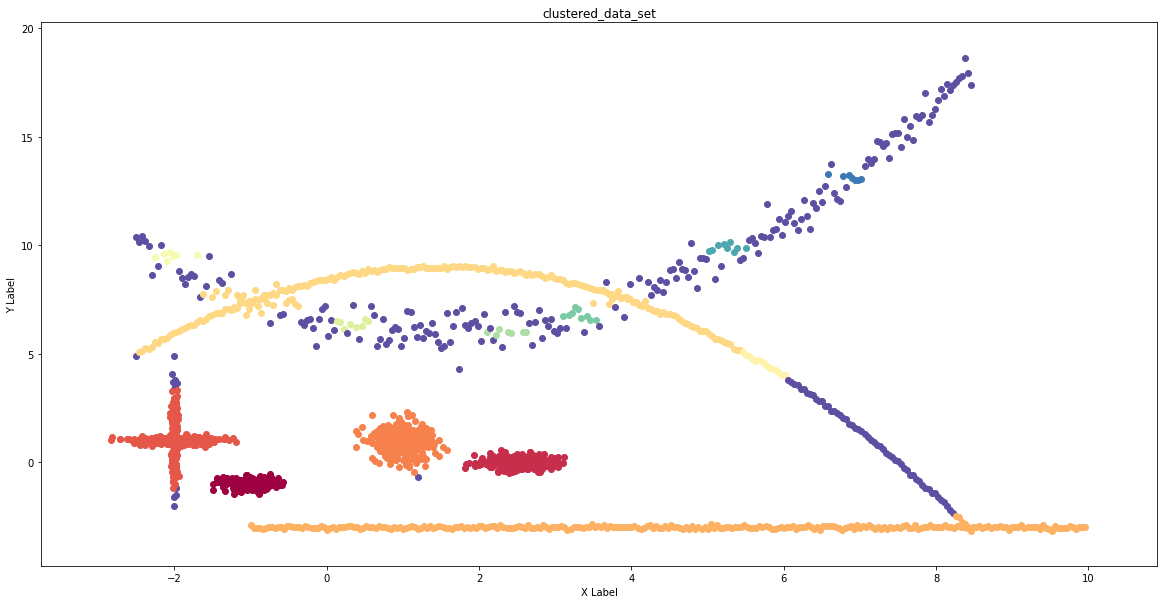

In [66]:
clustering = DBSCAN(eps=0.3, min_samples=7).fit(dg.data)
unique_labels = set(clustering.labels_)
print(len(unique_labels))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
fig, ax = plt.subplots(figsize=(20,10))
ax.use_sticky_edges = False
ax.margins(0.07)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title(f"clustered_data_set")
for c, d in zip(clustering.labels_, dg.data):
    plt.scatter(d[0], d[1], color=colors[c])